# Agriculture Project

In [1]:
# Importing the basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler , MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
# importing in the dataset
df = pd.read_excel('train_agriculture.xlsx')

In [3]:
df.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       4599 non-null   object 
 1   Estimated_Insects_Count  4599 non-null   int64  
 2   Crop_Type                4599 non-null   int64  
 3   Soil_Type                4599 non-null   int64  
 4   Pesticide_Use_Category   4599 non-null   int64  
 5   Number_Doses_Week        4599 non-null   int64  
 6   Number_Weeks_Used        4157 non-null   float64
 7   Number_Weeks_Quit        4599 non-null   int64  
 8   Season                   4599 non-null   int64  
 9   Crop_Damage              4599 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 359.4+ KB


In [5]:
# percentage of missing values in the dataframe
df.isna().mean()*100

ID                         0.000000
Estimated_Insects_Count    0.000000
Crop_Type                  0.000000
Soil_Type                  0.000000
Pesticide_Use_Category     0.000000
Number_Doses_Week          0.000000
Number_Weeks_Used          9.610785
Number_Weeks_Quit          0.000000
Season                     0.000000
Crop_Damage                0.000000
dtype: float64

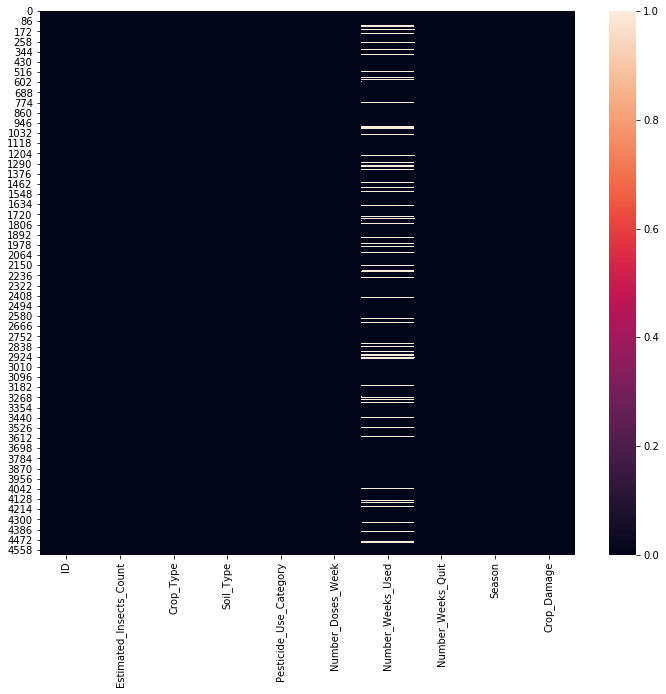

In [6]:
# plotting the missing values
plt.figure(figsize=(12,10))
sns.heatmap(df.isna())

In [7]:
df.Number_Weeks_Used = df.Number_Weeks_Used.fillna(df.Number_Weeks_Used.mean())

In [8]:
# percentage of missing values in the dataframe
df.isna().mean()*100

ID                         0.0
Estimated_Insects_Count    0.0
Crop_Type                  0.0
Soil_Type                  0.0
Pesticide_Use_Category     0.0
Number_Doses_Week          0.0
Number_Weeks_Used          0.0
Number_Weeks_Quit          0.0
Season                     0.0
Crop_Damage                0.0
dtype: float64

In [9]:
df.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000
mean,1363.000435,0.224831,0.476625,2.283540,26.477495,28.891027,9.205479,1.894325,0.194390
std,814.439120,0.417517,0.499508,0.471978,15.524647,11.965785,9.713253,0.694952,0.454597
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.891027,7.000000,2.000000,0.000000
75%,1786.000000,0.000000,1.000000,3.000000,40.000000,36.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000


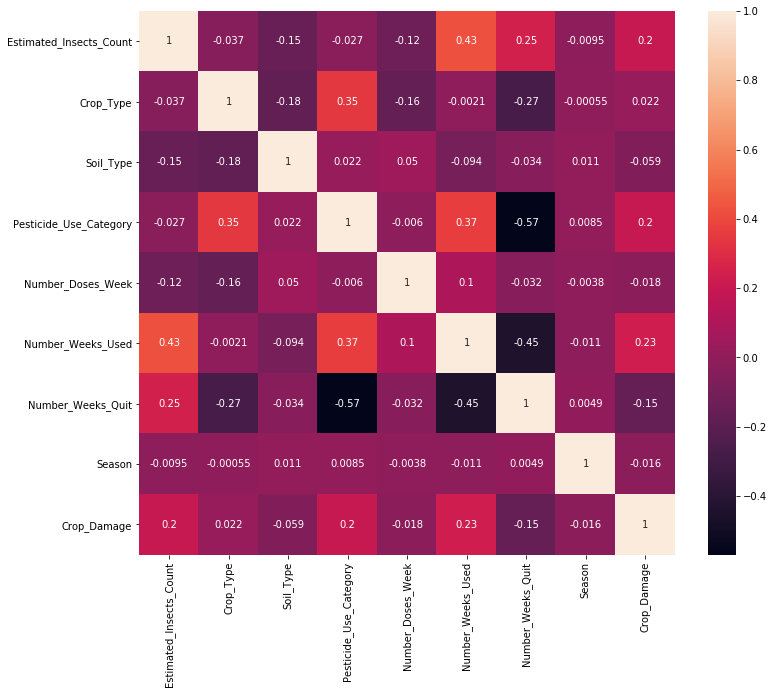

In [10]:
# Plotting the correlation on the heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot =True)

In [11]:
# Droping the ID feature as it is redundant
df_drop = df.drop( columns = 'ID')

In [12]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Estimated_Insects_Count  4599 non-null   int64  
 1   Crop_Type                4599 non-null   int64  
 2   Soil_Type                4599 non-null   int64  
 3   Pesticide_Use_Category   4599 non-null   int64  
 4   Number_Doses_Week        4599 non-null   int64  
 5   Number_Weeks_Used        4599 non-null   float64
 6   Number_Weeks_Quit        4599 non-null   int64  
 7   Season                   4599 non-null   int64  
 8   Crop_Damage              4599 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 323.5 KB


In [13]:
# finding the numerical and the categorical features
num_var,cat_var = [],[]
for col in df_drop:
    
    if len(df_drop[col].value_counts()) > 4:
        
        num_var.append(col)
    else:
        cat_var.append(col)

In [14]:
# seperating the numnerical features
num_var

['Estimated_Insects_Count',
 'Number_Doses_Week',
 'Number_Weeks_Used',
 'Number_Weeks_Quit']

In [15]:
# seperating the categorical features 
cat_var

['Crop_Type', 'Soil_Type', 'Pesticide_Use_Category', 'Season', 'Crop_Damage']

## EDA

In [16]:
# Checking the distribution of the data accross features

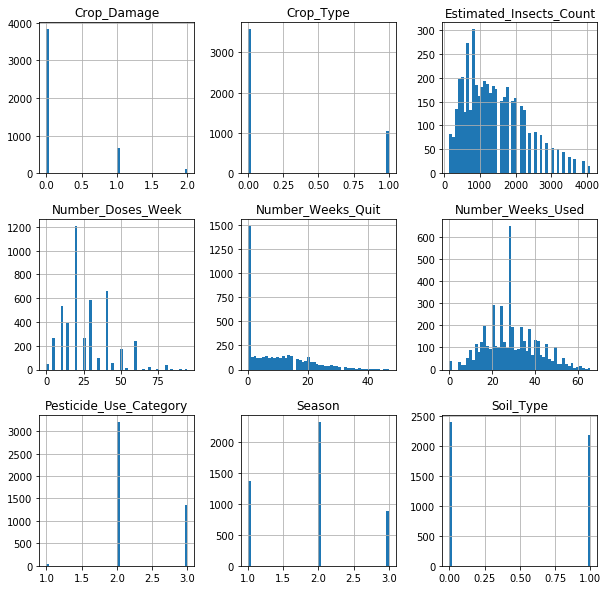

In [17]:
df.hist(bins=50, figsize = (10,10))
plt.show()

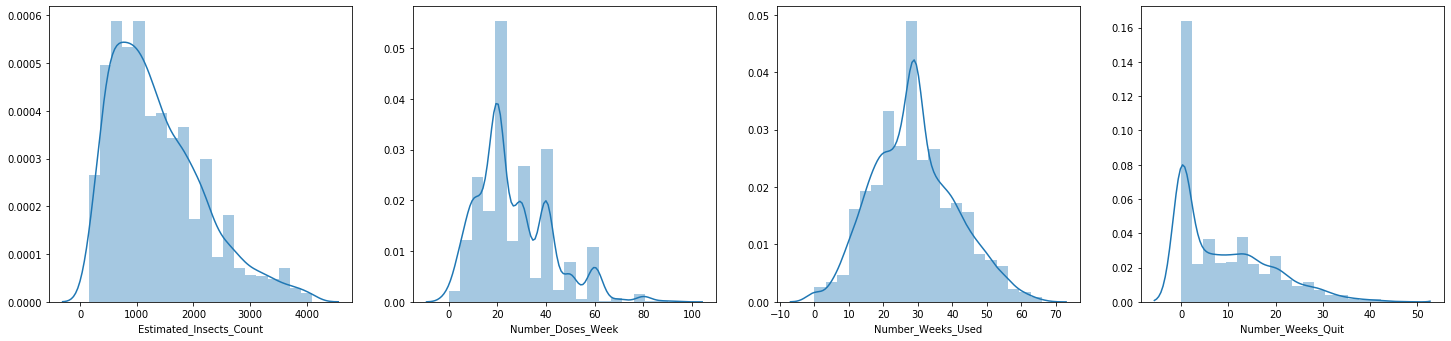

In [19]:
# checking the disribution of each feature
plt.figure(figsize=(25,25))       
for i,var in enumerate(num_var):
    plt.subplot(4,4,i+1)
    sns.distplot(df_drop[var], bins=20)

In [20]:
# Multiple plots for a single feature

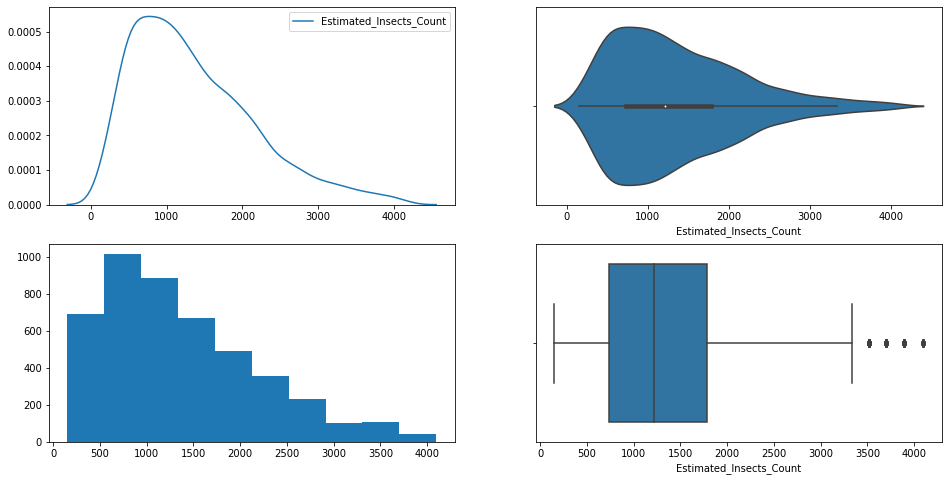

In [21]:
fig = plt.figure(figsize=(16,8))

fig.add_subplot(221)
sns.kdeplot(df.Estimated_Insects_Count)

fig.add_subplot(222)
sns.violinplot(df.Estimated_Insects_Count,orient='h')

fig.add_subplot(223)
plt.hist(df.Estimated_Insects_Count)

fig.add_subplot(224)
sns.boxplot(df.Estimated_Insects_Count)

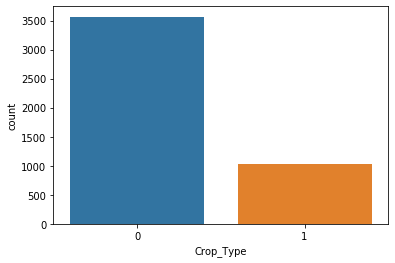

In [22]:
# Checking the type of crops
sns.countplot(df.Crop_Type)

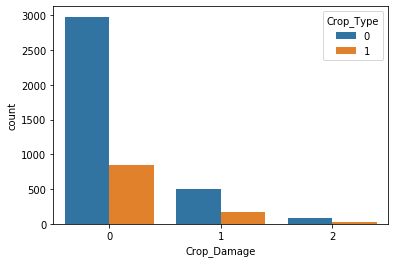

In [23]:
sns.countplot(df.Crop_Damage , hue = df.Crop_Type)

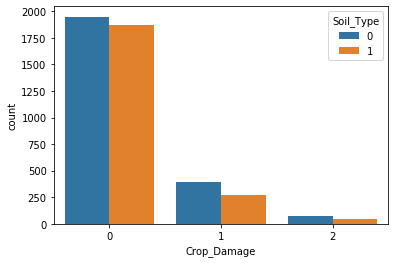

In [24]:
sns.countplot(df.Crop_Damage , hue = df.Soil_Type)

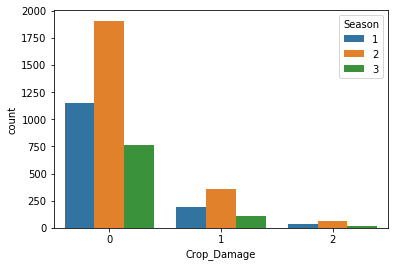

In [25]:
sns.countplot(df.Crop_Damage , hue = df.Season)

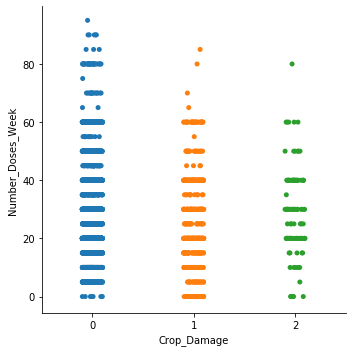

In [26]:
sns.catplot(y = 'Number_Doses_Week' , x = 'Crop_Damage' , data = df)

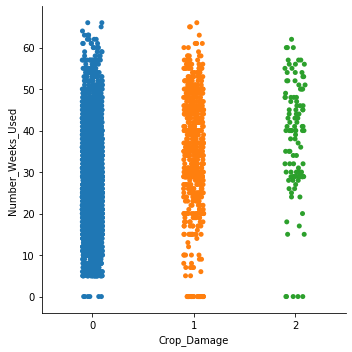

In [27]:
sns.catplot('Crop_Damage','Number_Weeks_Used',data=df.dropna())

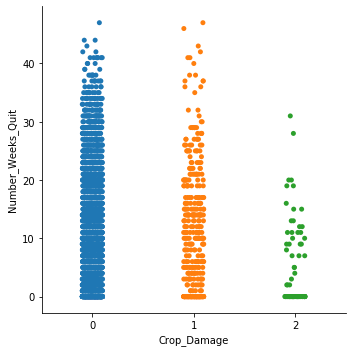

In [28]:
sns.catplot('Crop_Damage','Number_Weeks_Quit',data=df.dropna())

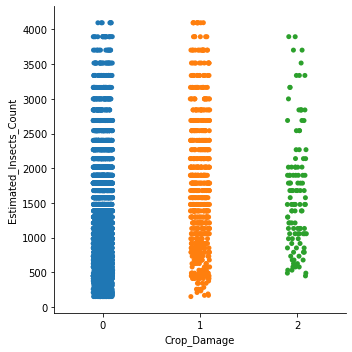

In [29]:
sns.catplot('Crop_Damage','Estimated_Insects_Count',data=df.dropna())

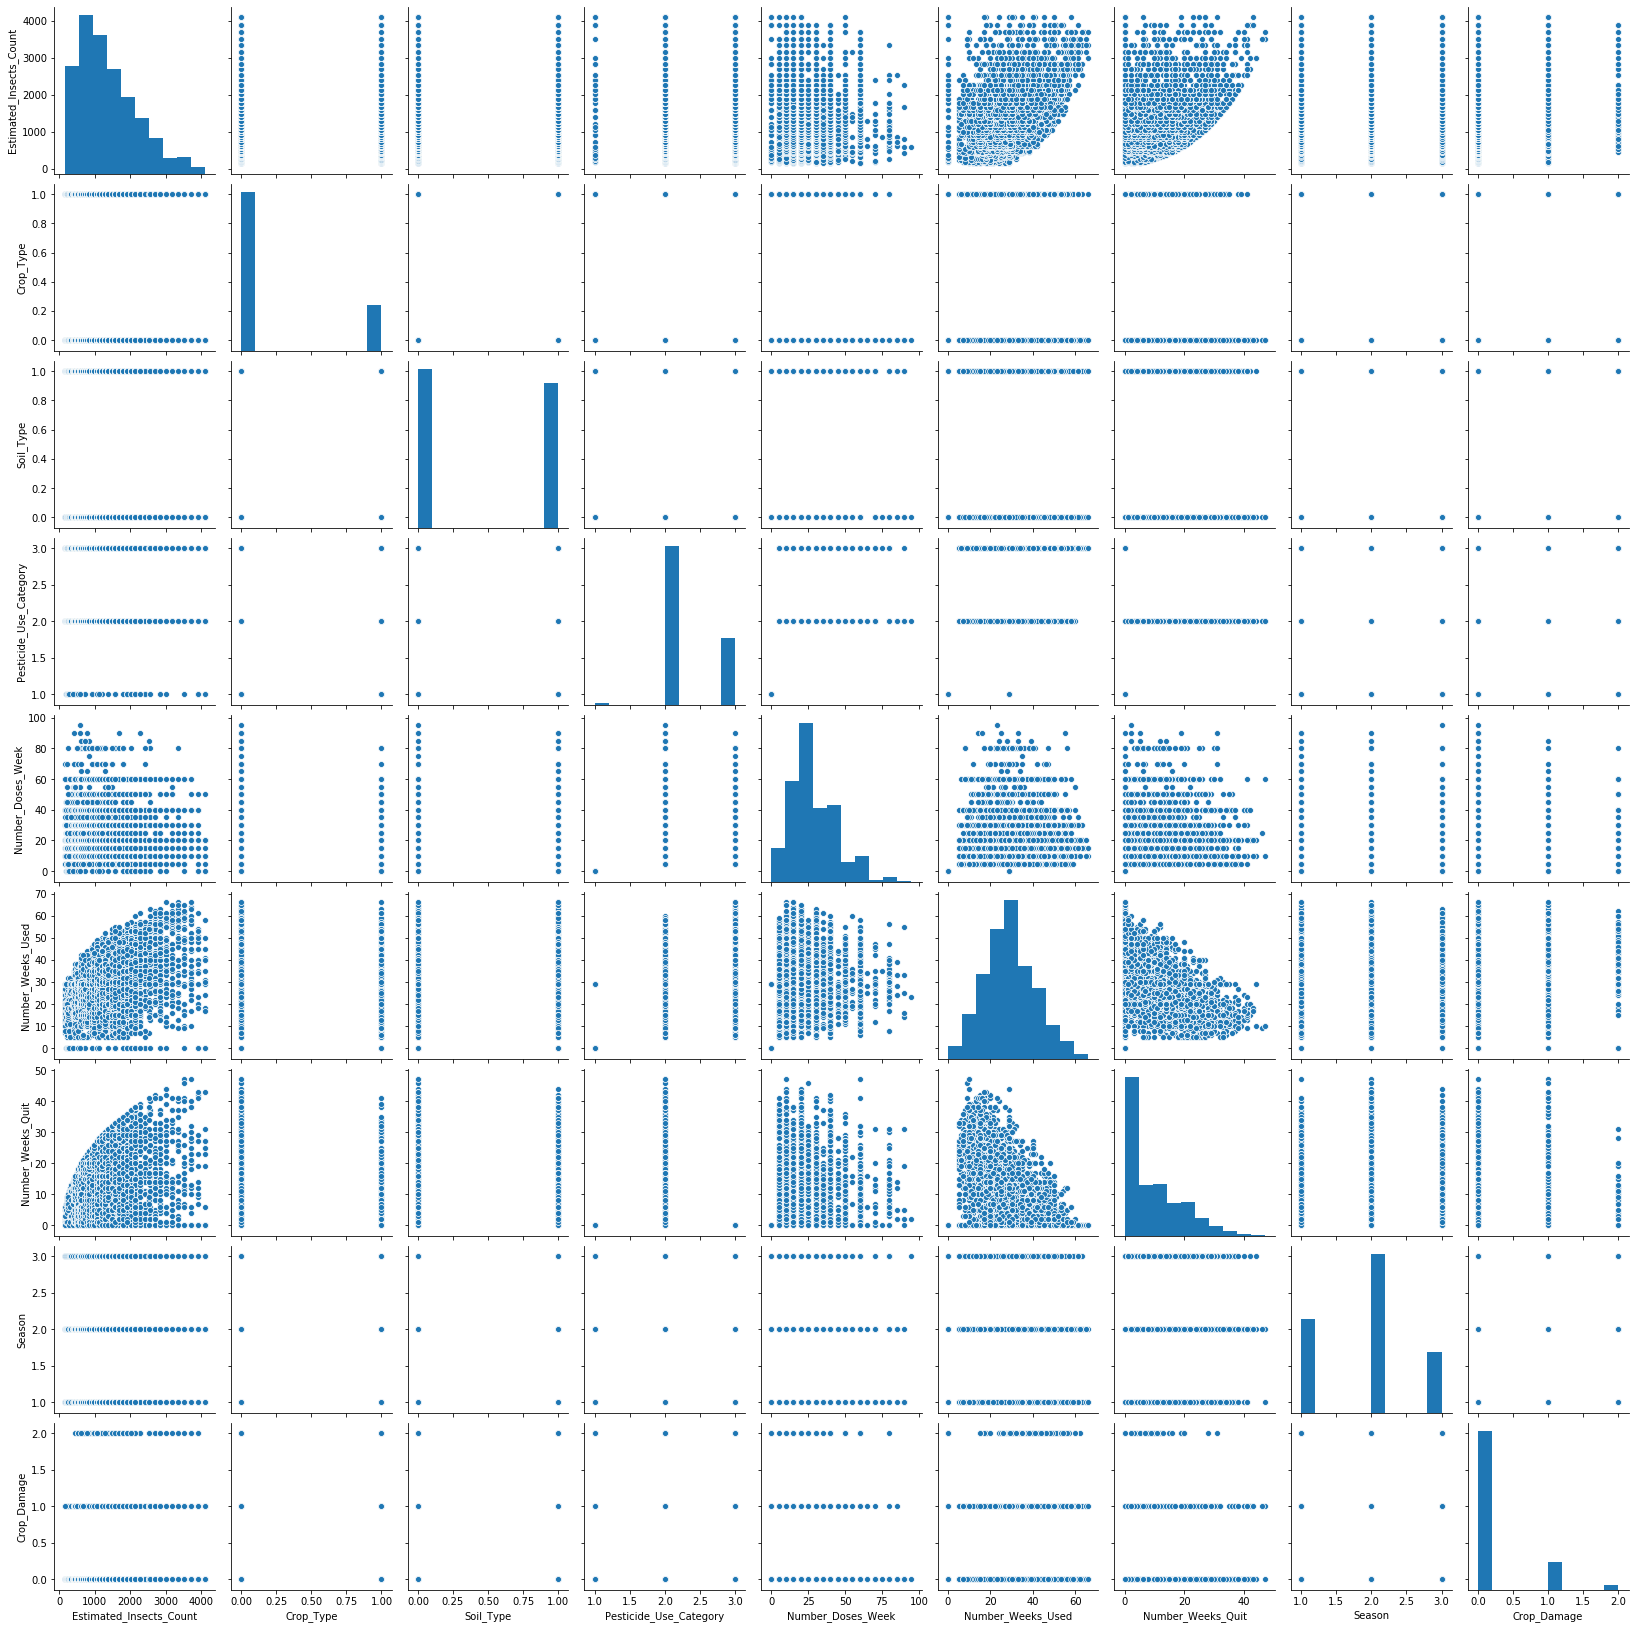

In [65]:
sns.pairplot(df)

### Data processing

In [32]:
# function to create histogram, Q-Q plot and boxplot

# for Q-Q plots
import scipy.stats as stats

def diagnostic_plots(df_drop, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

******* Estimated_Insects_Count *******


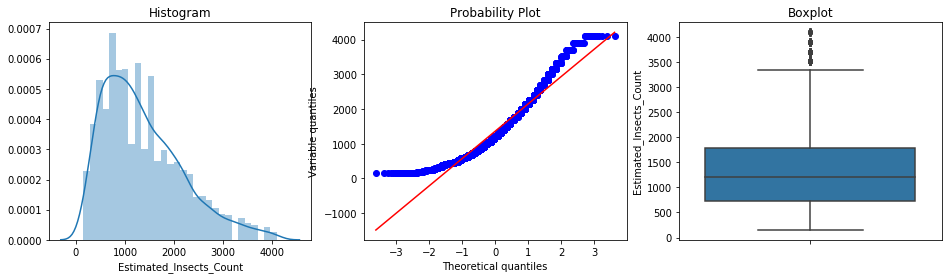

******* Number_Doses_Week *******


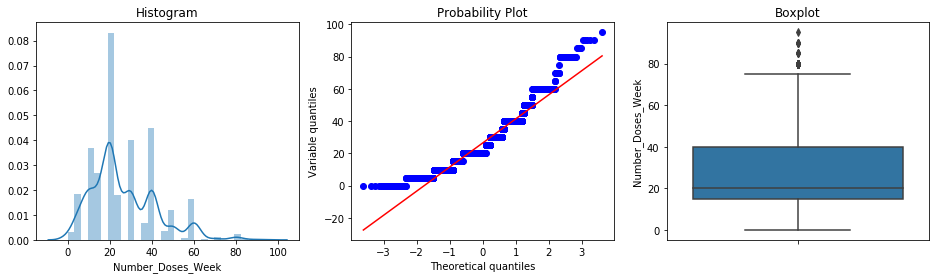

******* Number_Weeks_Used *******


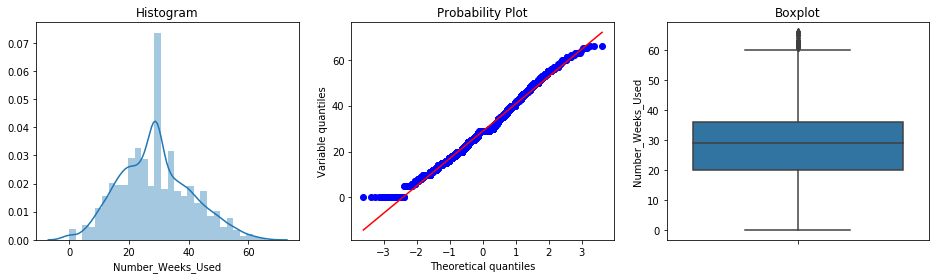

******* Number_Weeks_Quit *******


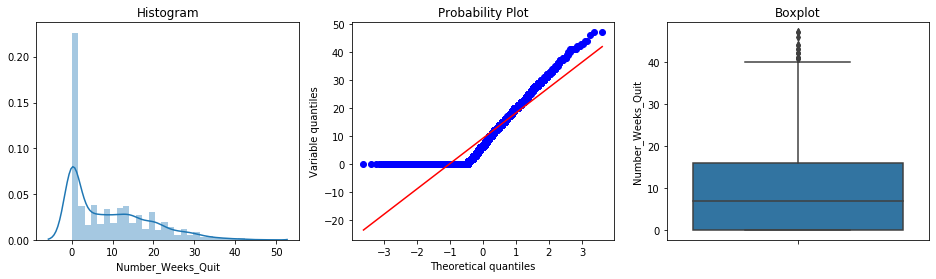

In [34]:
#  Checking the outliers
for var in num_var:
  print("******* {} *******".format(var))
  diagnostic_plots(df_drop, var)

  # here we observe outlier using histogram,, qq plot and boxplot

In [36]:
from scipy.stats import zscore
z_scores = stats.zscore(df_drop)

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)

df_drop = df_drop[filtered_entries]

In [37]:
df.shape

(4599, 10)

In [38]:
df_drop.shape

(4370, 9)

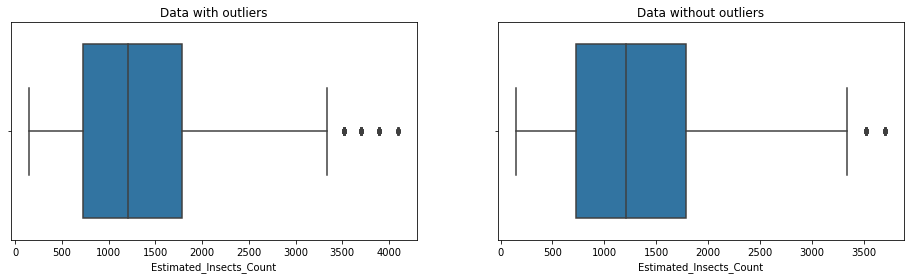

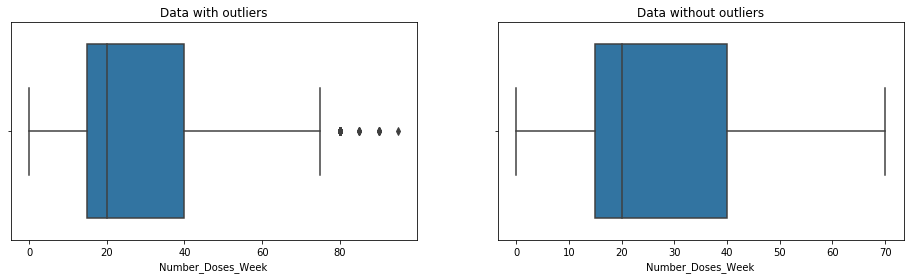

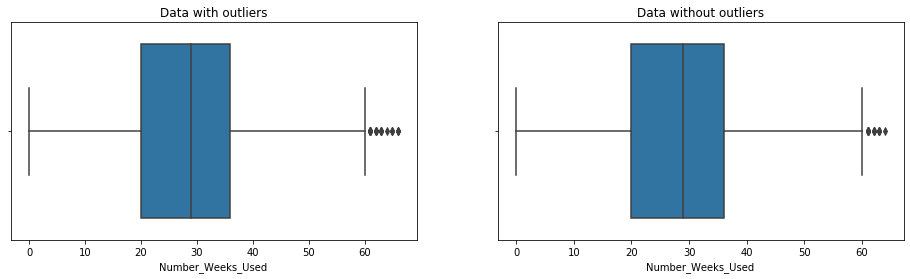

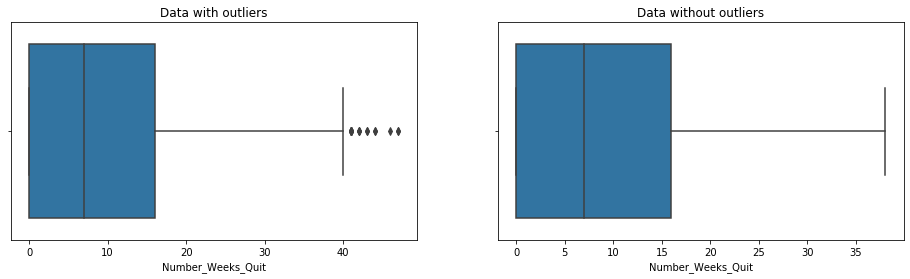

In [40]:
# before and after removing the outliers
for col in num_var:
    fig = plt.figure(figsize=(16, 4))
    
    fig.add_subplot(121)
    sns.boxplot(df[col])
    plt.title('Data with outliers')
    
    fig.add_subplot(122)
    sns.boxplot(df_drop[col])
    plt.title('Data without outliers')

In [41]:
# Checking the skewness 
df_drop.skew()

Estimated_Insects_Count    0.789806
Crop_Type                  1.308548
Soil_Type                  0.079724
Pesticide_Use_Category     0.753578
Number_Doses_Week          0.711083
Number_Weeks_Used          0.275330
Number_Weeks_Quit          0.813382
Season                     0.141605
Crop_Damage                2.003206
dtype: float64

In [44]:
# Treating the skewness using log transformation
np.log(df_drop[num_var]+1).skew()

Estimated_Insects_Count   -0.543203
Number_Doses_Week         -1.181035
Number_Weeks_Used         -2.229302
Number_Weeks_Quit         -0.234282
dtype: float64

In [45]:
# Treating the skewness using Sqrt Transformation
np.sqrt(df_drop[num_var]).skew()

Estimated_Insects_Count    0.179172
Number_Doses_Week         -0.097393
Number_Weeks_Used         -0.685639
Number_Weeks_Quit          0.006921
dtype: float64

In [47]:
# Finalysing the Sqrt Transformation
df_drop[num_var] = np.sqrt(df_drop[num_var])

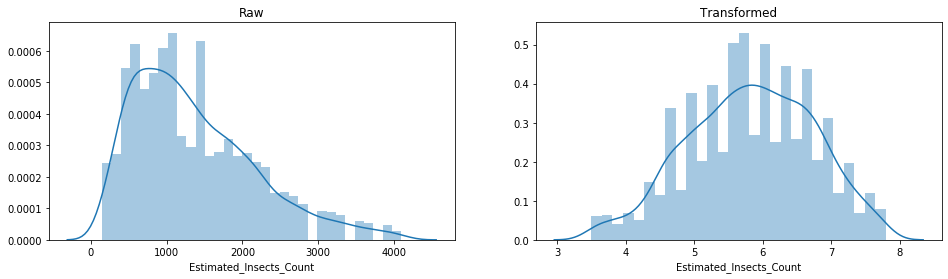

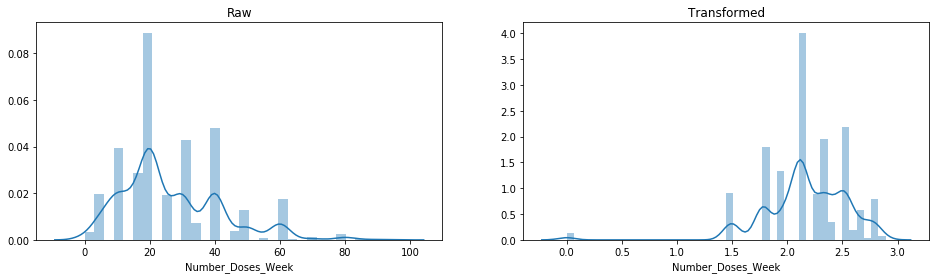

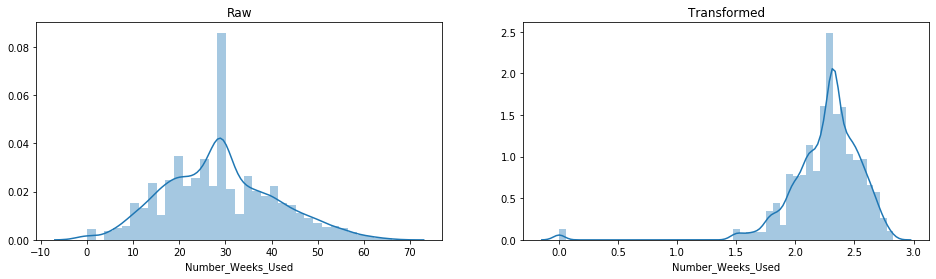

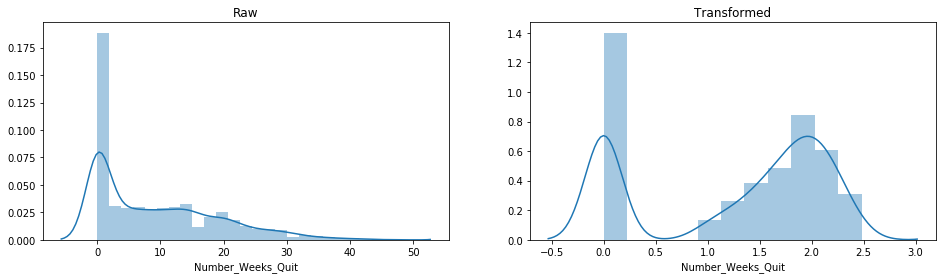

In [49]:
# before and after : skew transformation
for col in num_var:
    fig = plt.figure(figsize=(16,4))
    
    fig.add_subplot(121)
    sns.distplot(df[col])
    plt.title('Raw')
    fig.add_subplot(122)
    sns.distplot(df_drop[col])
    plt.title('Transformed')

In [50]:
df_drop.isna().sum()

Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

In [53]:
# Splitting the target Variable
x = df_drop.drop('Crop_Damage',1)
y = df_drop['Crop_Damage']

In [54]:
#Split data into separate training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size=0.2, random_state=0)
print('Shape of x_train = ', x_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of x_test = ', x_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of x_train =  (3496, 8)
Shape of y_train =  (3496,)
Shape of x_test =  (874, 8)
Shape of y_test =  (874,)


In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier

In [56]:
KNN=KNeighborsClassifier()
SV=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier()
GNB=GaussianNB()
RFC=RandomForestClassifier()
GBC=GradientBoostingClassifier()
ABC=AdaBoostClassifier()
ETC=ExtraTreesClassifier()

In [57]:
models = []
models.append(('KNeighborsClassifier', KNN))
models.append(('SVC', SV))
models.append(('LogisticRegression', LR))
models.append(('DecisionTreeClassifier', DT))
models.append(('GaussianNB', GNB))
models.append(('RandomForestClassifier', RFC))
models.append(('GradientBoostingClassifier', GBC))
models.append(('ExtraTreesClassifier',ETC))
models.append(('AdaBoostClassifier',ABC))

In [58]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

In [60]:
Model = []
score = []
cvs=[]
rocscore=[]
for name,model in models:
    print('***********************',name,'***********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score = ',AS)
    score.append(AS*100)
    print('\n')
    sc = cross_val_score(model, x_test, y_test, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc*100)
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)

*********************** KNeighborsClassifier ***********************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


Accuracy_score =  0.8409610983981693


Cross_Val_Score =  0.8352403343782655
classification_report
               precision    recall  f1-score   support

           0       0.88      0.94      0.91       751
           1       0.38      0.21      0.27       123

    accuracy                           0.84       874
   macro avg       0.63      0.58      0.59       874
weighted avg       0.81      0.84      0.82       874



[[709  42]
 [ 97  26]]
*********************** SVC ***********************


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001,

In [61]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score ,'Cross_val_score':cvs})
print(result.sort_values(by = 'Accuracy_score',ascending=True))

                        Model  Accuracy_score  Cross_val_score
3      DecisionTreeClassifier       77.116705        77.459509
0        KNeighborsClassifier       84.096110        83.524033
4                  GaussianNB       84.096110        84.557210
8          AdaBoostClassifier       84.553776        85.241641
7        ExtraTreesClassifier       84.668192        83.868861
5      RandomForestClassifier       84.897025        85.242947
6  GradientBoostingClassifier       85.354691        85.701411
2          LogisticRegression       85.697941        85.816353
1                         SVC       86.613272        86.388454


#As we can see from above trials the best performance is given by SVC so it is the final model selected

In [63]:
# SAVING THE BEST MODEL:
import joblib
joblib.dump(SV,'Agriculture.pkl')

['Agriculture.pkl']